# ME:4111 Scientific Computing and Machine Learning 
# Lecture 28: SVR and Unsupervised Learning - SVR (Linear regression)
# by Prof. Shaoping Xiao

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
Accident= pd.read_csv('traffic.csv')
Accident.head()

,Hour (Coded);Immobilized bus;Broken Truck;Vehicle excess;Accident victim;Running over;Fire vehicles;Occurrence involving freight;Incident involving dangerous freight;Lack of electricity;Fire;Point of flooding;Manifestations;Defect in the network of trolleybuses;Tree on the road;Semaphore off;Intermittent Semaphore;Slowness in traffic (%)
1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;4,1.0
2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;6,6.0
3;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;8,7.0
4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;9,2.0
5;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;11,1.0


In [15]:
print(Accident['Vict'])
print(Accdident['Vict'][1])
print(len(Accident))

KeyError: 'Vict'

### randomly generate data points for regression problems

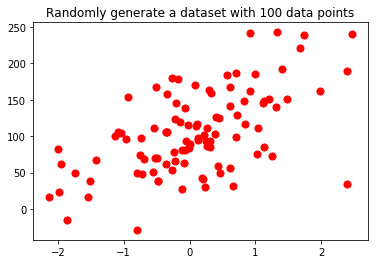

In [5]:
from sklearn.datasets import make_regression
Accident= pd.read_CSV('traffic')
plt.figure()
plt.title('Randomly generate a dataset with 100 data points')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 100.0,
                            noise = 50, random_state=10)
plt.scatter(X_R1, y_R1, marker= 'o', c='red', s=50)

plt.show()

### training/test split (test size is 25%)

In [6]:
from sklearn.model_selection import train_test_split
XR_train, XR_test, yR_train, yR_test = train_test_split(X_R1, y_R1, random_state = 0)

### SVR with linear kernel

In [7]:
from sklearn.svm import SVR
Lreg_C = 1.0 # Penalty parameter C of the error term
LregSVR = SVR(kernel='linear', C=Lreg_C)
LregSVR.fit(XR_train, yR_train)
yR_pred = LregSVR.predict(XR_train)

### compare to the least-square linearRegression

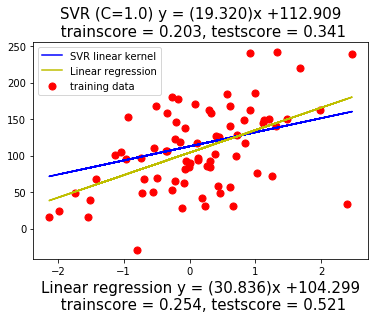

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(XR_train, yR_train)
yL_pred = linreg.predict(XR_train)

train_score=LregSVR.score(XR_train, yR_train)
test_score=LregSVR.score(XR_test, yR_test)
Ltrain_score=linreg.score(XR_train, yR_train)
Ltest_score=linreg.score(XR_test, yR_test)


plt.title('SVR (C={}) y = ({:.3f})x +{:.3f}\n trainscore = {:.3f}, testscore = {:.3f}'
          .format(Lreg_C, LregSVR.coef_[0,0], LregSVR.intercept_[0], train_score, test_score), size=15)
plt.scatter(XR_train, yR_train, marker= 'o', c='red', s=50, label='training data')
plt.plot(XR_train, yR_pred, 'b-', label='SVR linear kernel')
plt.plot(XR_train, yL_pred, 'y-', label='Linear regression')
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)
plt.xlabel('Linear regression y = ({:.3f})x +{:.3f}\n trainscore = {:.3f}, testscore = {:.3f}'
           .format(linreg.coef_[0], linreg.intercept_, Ltrain_score, Ltest_score), size=15)
plt.show()